In [83]:
# Import the neccessarily packages
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
#loading the traing set into df
data_train_df = pd.read_excel("C:/Users/Hp/Desktop/MY PROJECT/ASSIGMENT/Flight-Price-Predictions-with-Deep-Learning/data_train.xlsx")


In [4]:
data_train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


***Data Accessing***

In [5]:
#Data_train Variable Identification (Top five Rows)
data_train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
#Data_train Variable Identification(Bottom five rows) 
data_train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
#Data_train Variable Identification(Randomly sample 7 rows) 
data_train_df.sample(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6201,IndiGo,27/03/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:35 28 Mar,10h 35m,1 stop,No info,8075
2307,Air Asia,27/06/2019,Delhi,Cochin,DEL → BLR → COK,07:55,22:25,14h 30m,1 stop,No info,6152
10137,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,18:15 19 May,23h 20m,1 stop,In-flight meal not included,10844
4904,SpiceJet,1/05/2019,Kolkata,Banglore,CCU → IXB → BLR,11:15,18:30,7h 15m,1 stop,No info,8844
5466,Jet Airways,21/03/2019,Delhi,Cochin,DEL → BHO → BOM → COK,05:40,04:25 22 Mar,22h 45m,2 stops,No info,11543
9433,Jet Airways,24/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,18:15,11h 45m,1 stop,No info,14571
3121,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,09:20 10 Jun,13h 20m,1 stop,In-flight meal not included,11841


In [8]:
#Display Data_train  Information/ summary 
data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
#check for  Data_train  missing values 
data_train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#check for  Data_train  Duplicated  values
data_train_df.duplicated().sum()

220

In [11]:
#Display all Data_train columns 
data_train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
#check for  Data_train  datatype 
data_train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
#Display all Data_train Dimmensions
data_train_df.shape

(10683, 11)

***DATA CLEANING***

*****step 1*****
# Data_train  Missing values treatment

In [14]:
# fill the missing values in Route  columns with mode value
Mod_Route = data_train_df['Route']. mode()[0]
data_train_df['Route'].fillna(Mod_Route, inplace= True)
data_train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [15]:
# fill the missing values in 'Gender'columns with mode value
Mod_Total_Stops= data_train_df[ 'Total_Stops']. mode()[0]
data_train_df['Total_Stops'].fillna(Mod_Total_Stops, inplace=True)
data_train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [16]:
data_train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

 *****step 2*****
# Data_train Duplicate values treatment 

***DATA EXPLORATION***

In [17]:
Airline_Rate= data_train_df['Airline'].value_counts()
Airline_Rate

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [18]:
Airline_Rate.index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [19]:
Airline_Rate.values

array([3849, 2053, 1752, 1196,  818,  479,  319,  194,   13,    6,    3,
          1], dtype=int64)

<AxesSubplot:>

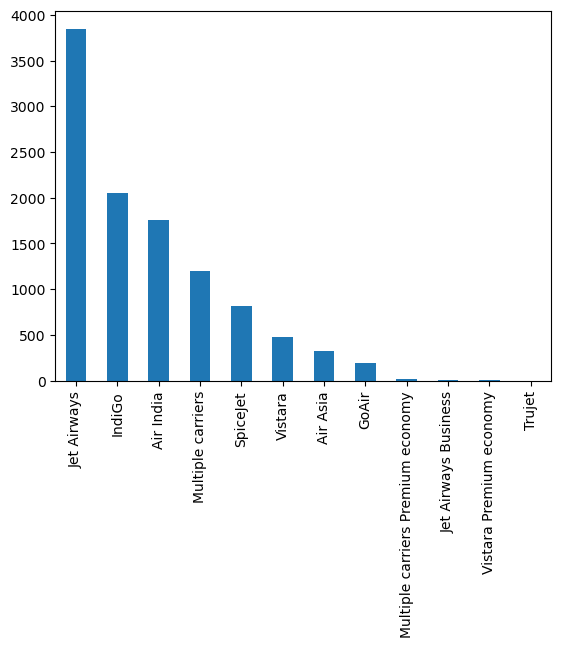

In [20]:
Airline_Rate.plot(kind= "bar")

In [21]:
#proper plotting
def univariate_cat(col):
    Airline_Rate = data_train_df[col].value_counts()
    list_a=  Airline_Rate.values
    total_a= sum( Airline_Rate.values)
    sns.set_palette("Set2") # for coloring
    fig, ola = plt.subplots(figsize= (10, 6))
    Airline_Rate.plot(kind= "bar", ax= ola) # pandas plot
    plt.grid(axis= "y")
    plt.xticks(color= "red", rotation= 30)
    plt.yticks(color= "red", rotation= 30)
    plt.title( f"count of {col}", color= 'red')
    for index, val in enumerate(list_a):
        plt.text(x=index, y= val+0.5, s= f"{round((val/total_a)*100)}%"  )
    plt.show()


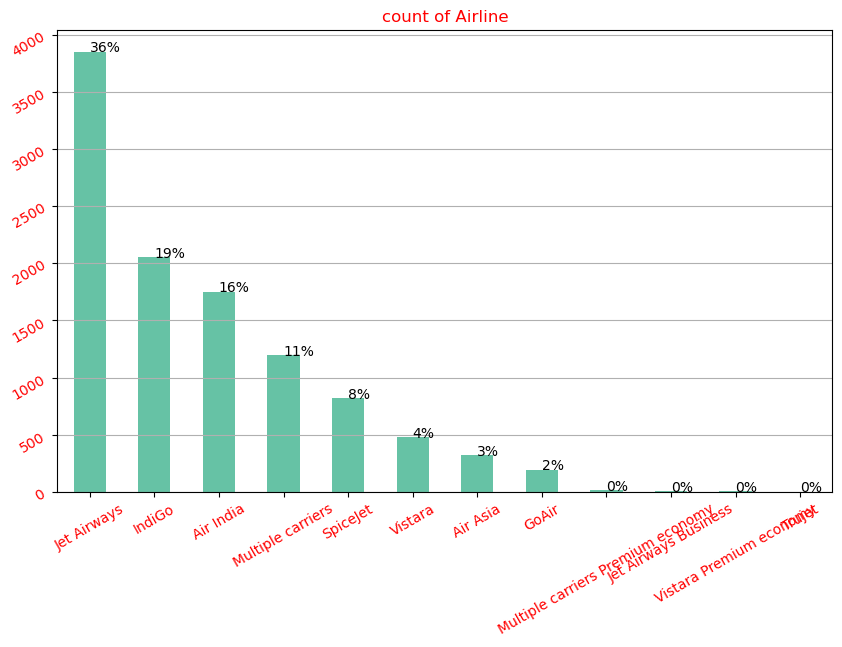

In [22]:
univariate_cat("Airline")

In [23]:
data_train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [24]:
data_train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

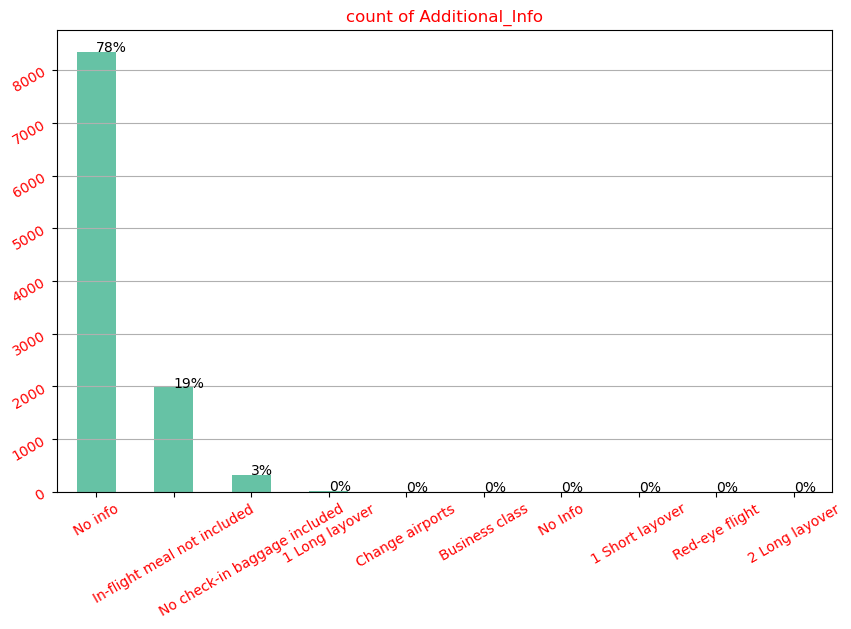

In [25]:
univariate_cat("Additional_Info")

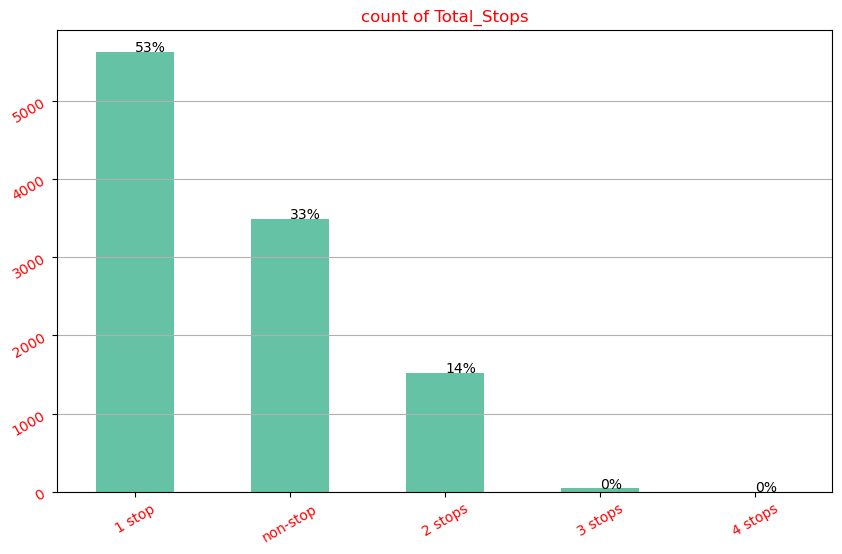

In [26]:
univariate_cat("Total_Stops")

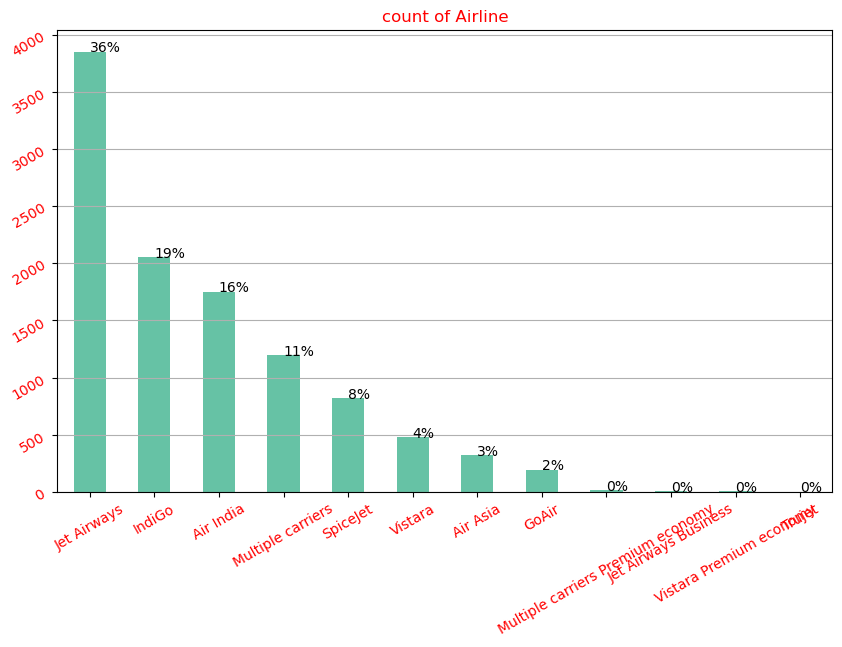

In [31]:
univariate_cat("Airline")

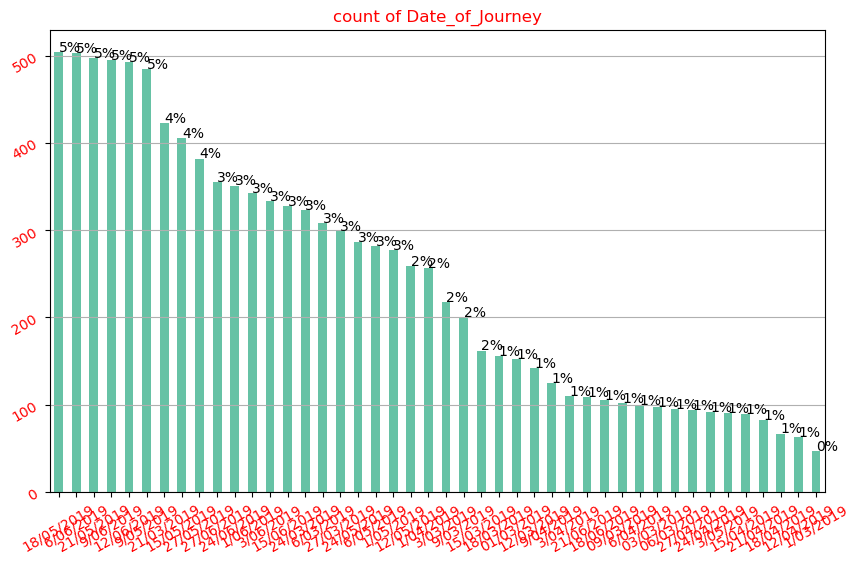

In [32]:
univariate_cat("Date_of_Journey")

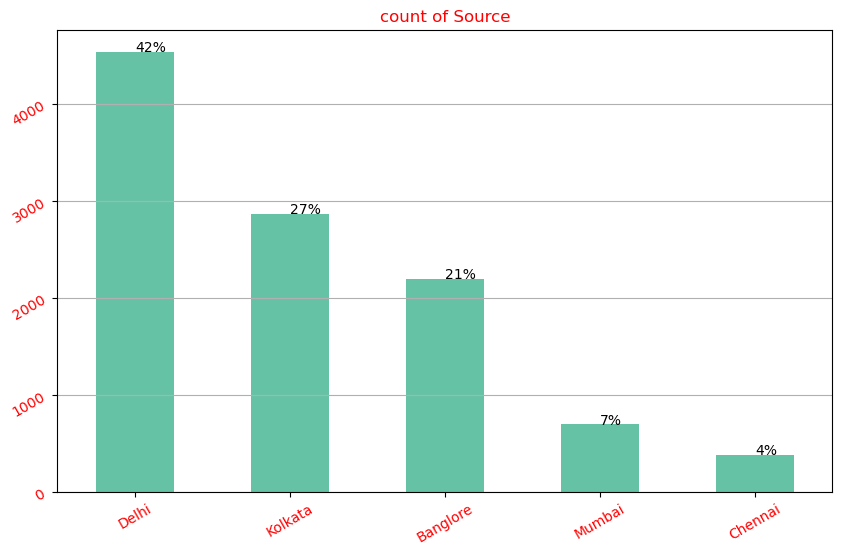

In [39]:
univariate_cat("Source")

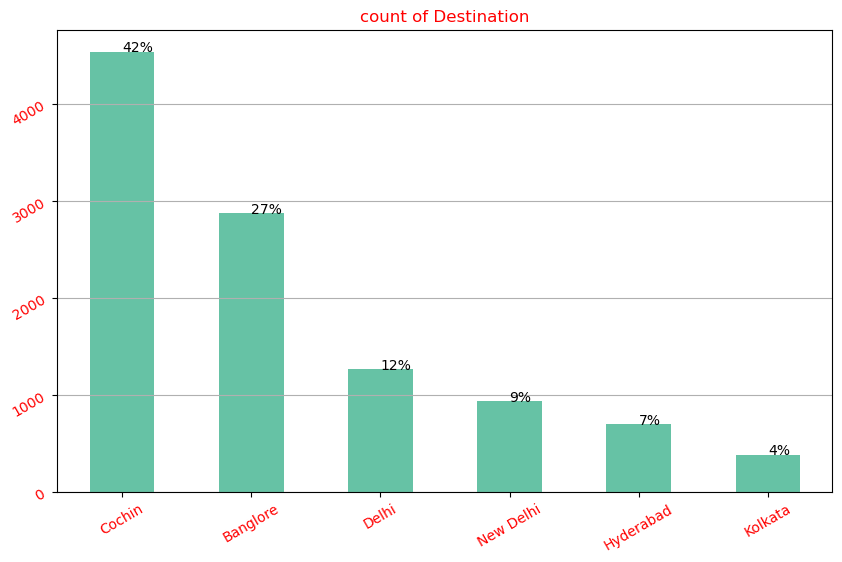

In [40]:
univariate_cat("Destination")

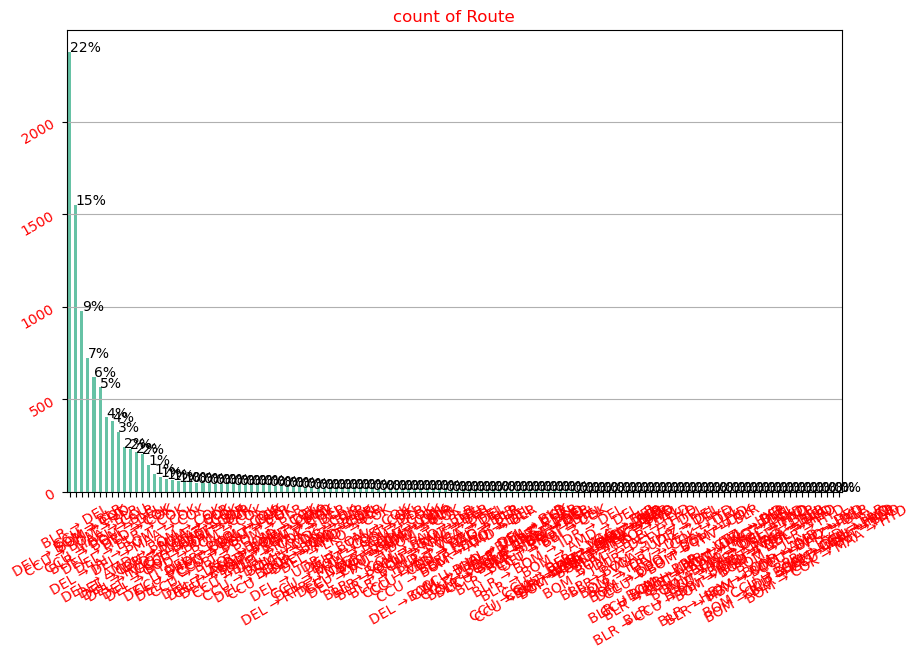

In [41]:
univariate_cat("Route")

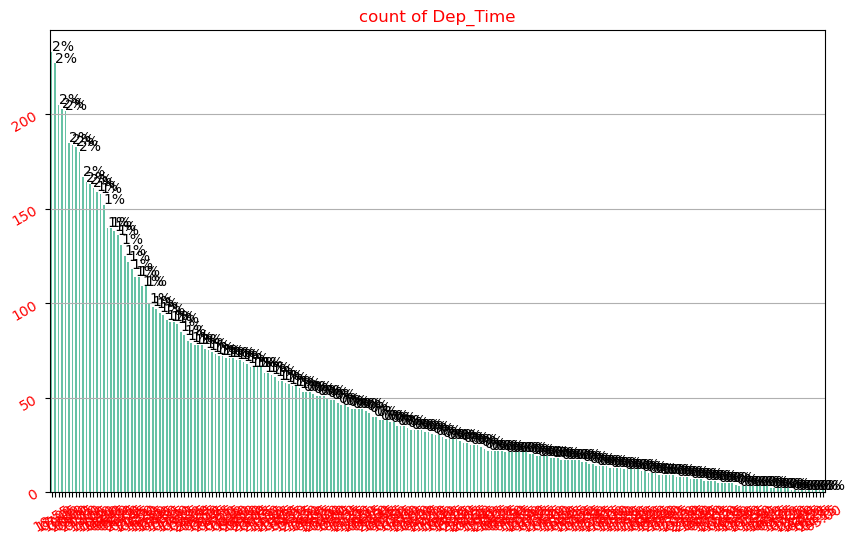

In [44]:
univariate_cat("Dep_Time")

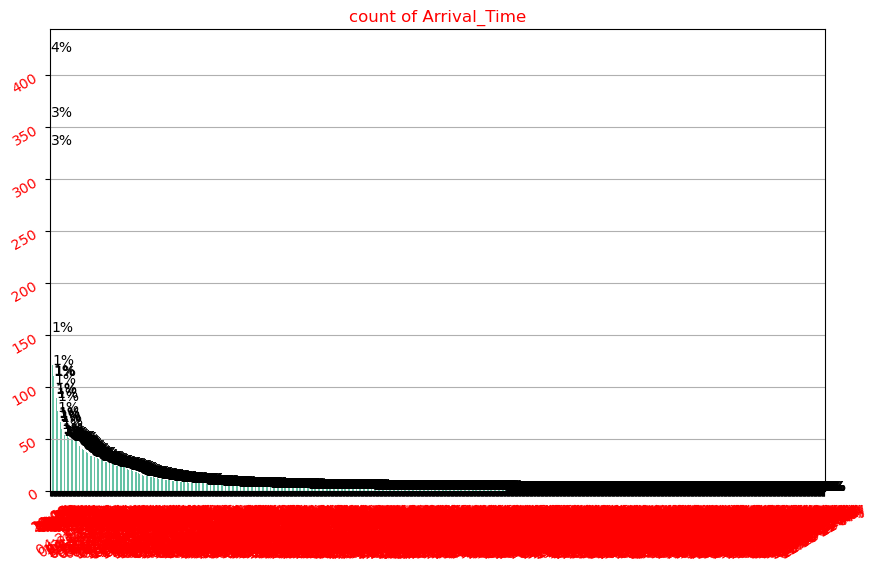

In [48]:
univariate_cat("Arrival_Time")

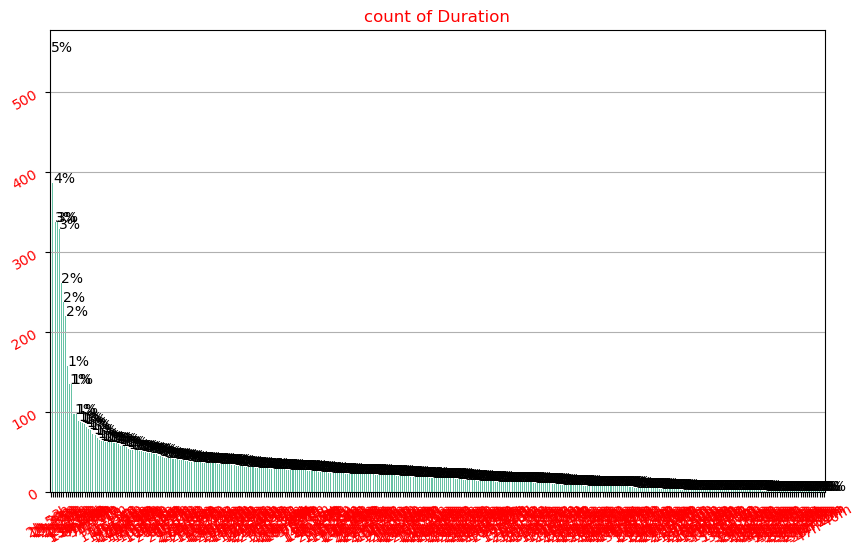

In [49]:
univariate_cat("Duration")

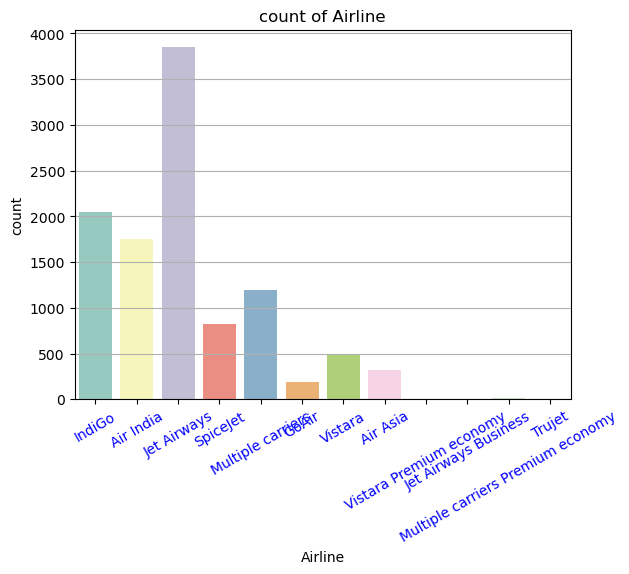

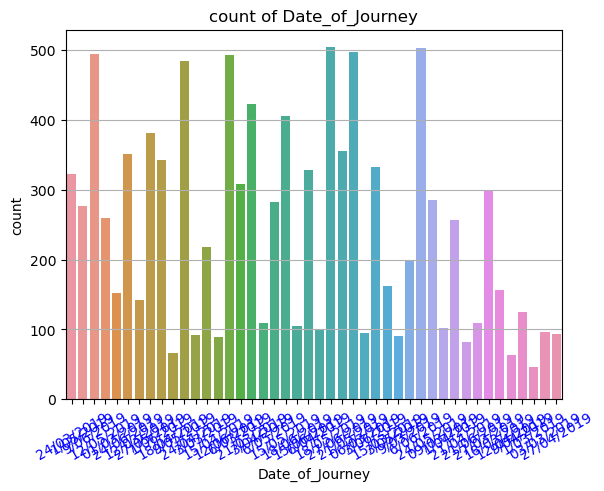

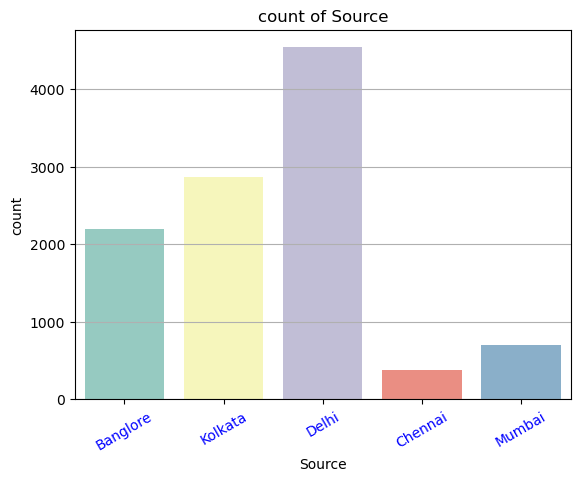

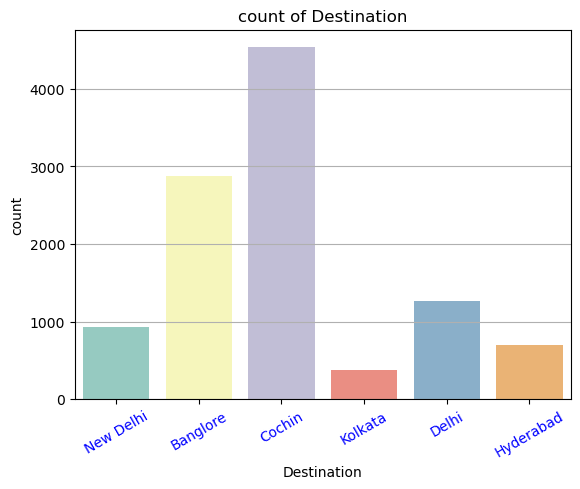

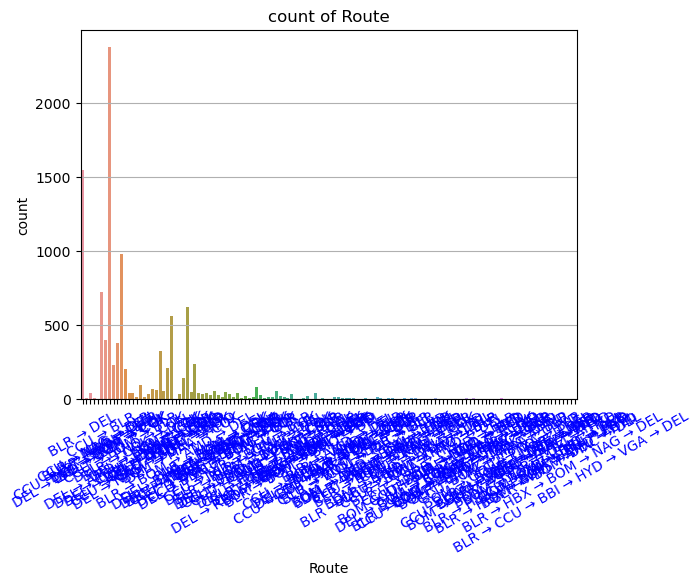

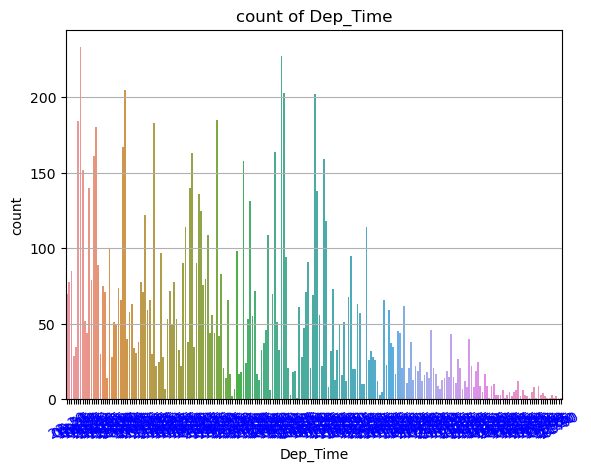

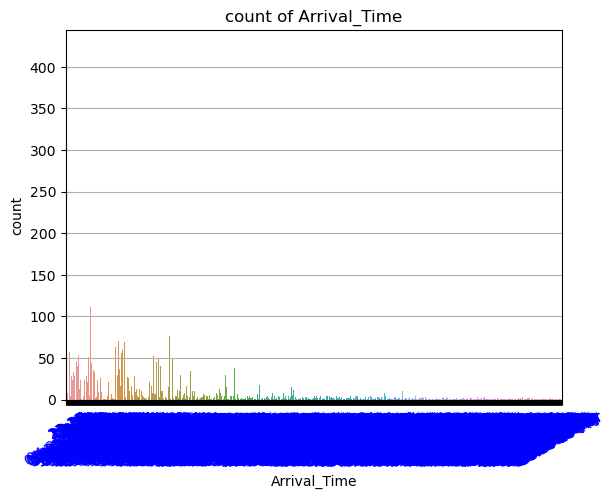

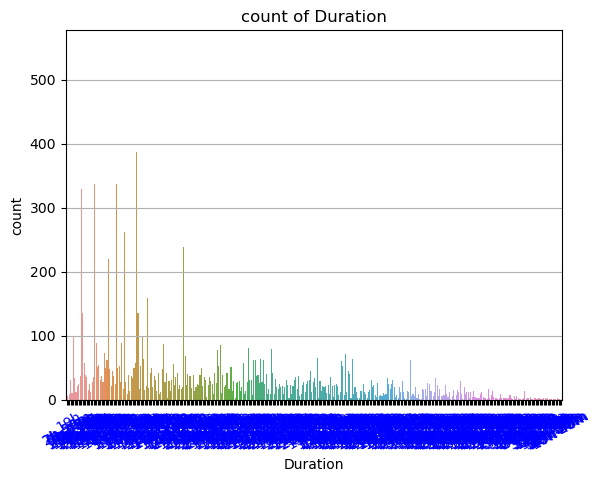

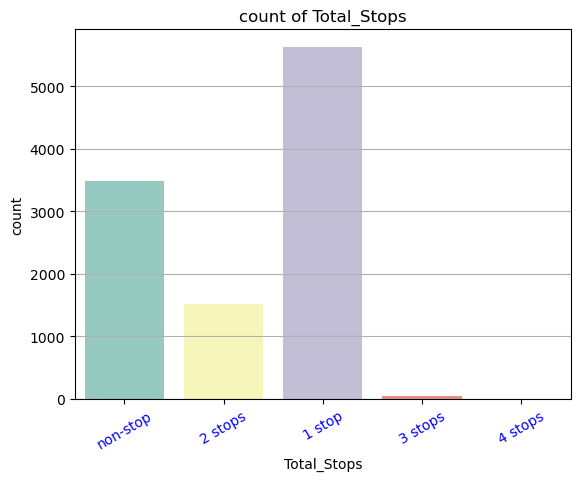

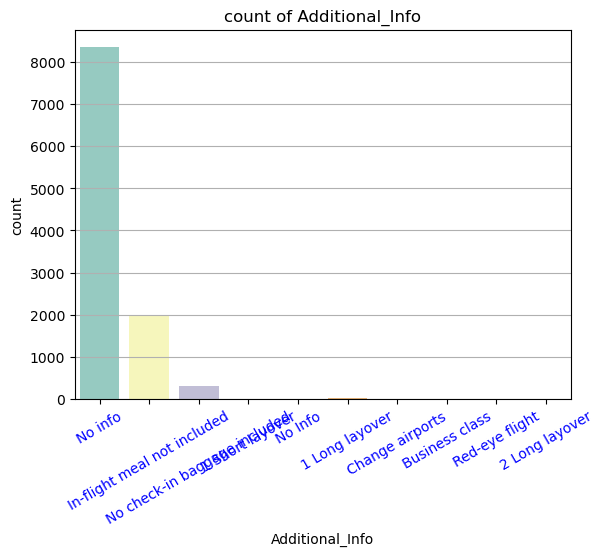

In [27]:
sns.set_palette("Set3")
for i in data_train_df.select_dtypes(include=["object"]).columns:
    sns.countplot(x=data_train_df[i])
    plt.grid(axis="y")
    plt.title(f"count of {i}")
    plt.xticks(rotation= 30, color= "blue")
    plt.show()

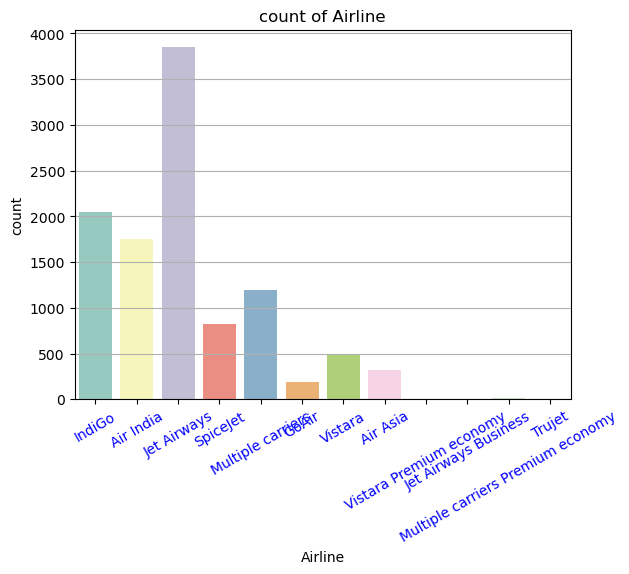

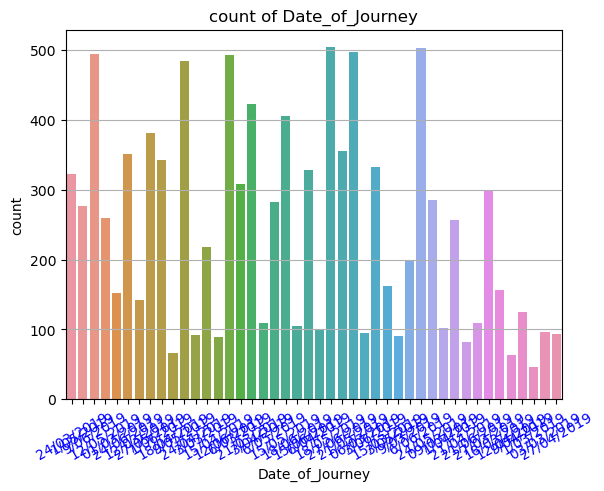

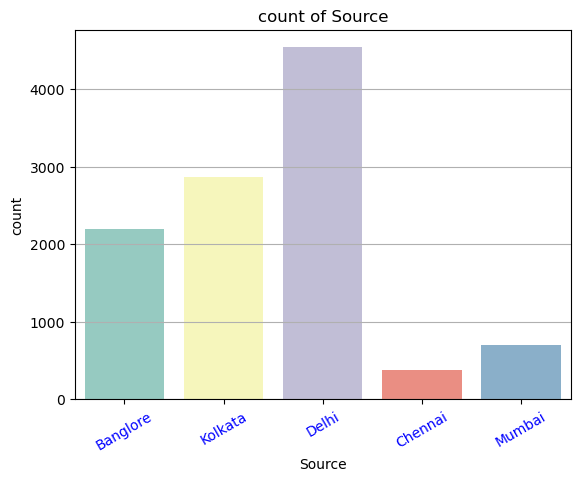

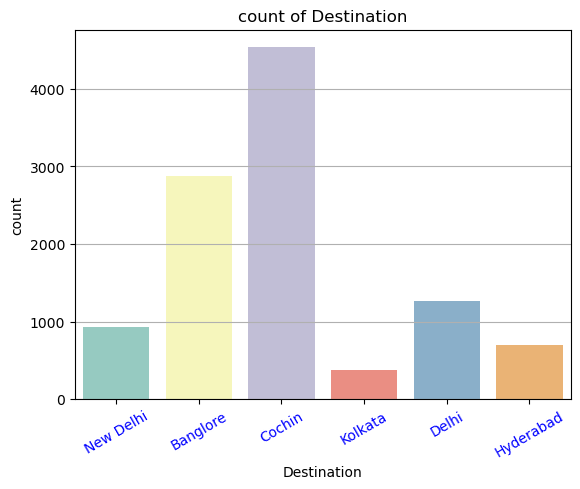

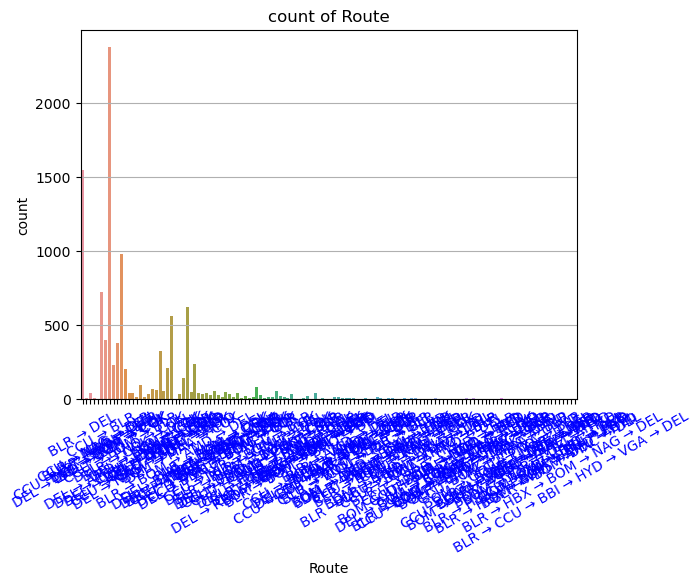

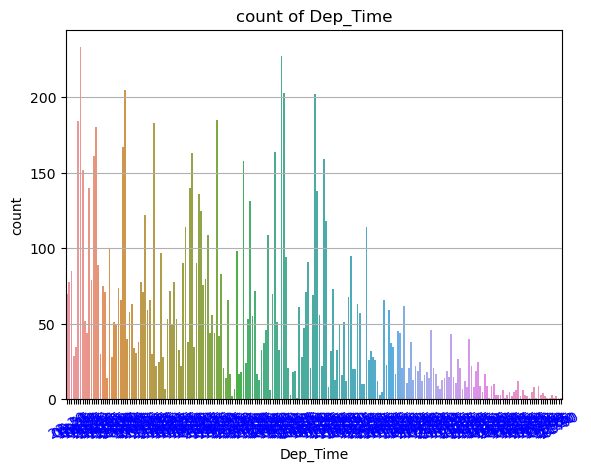

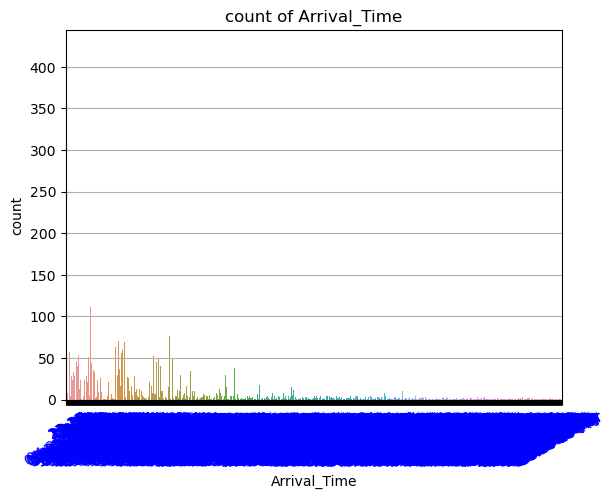

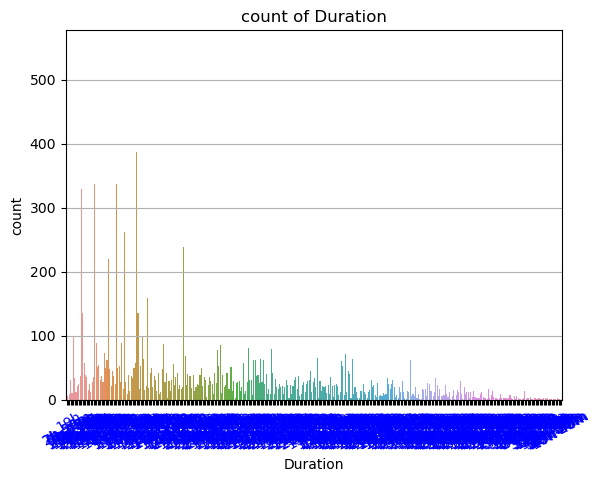

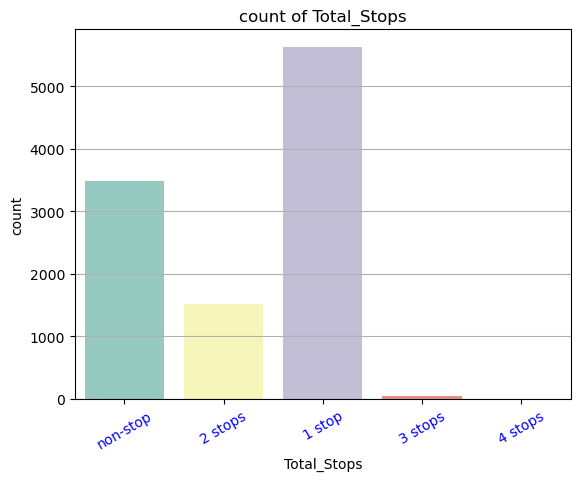

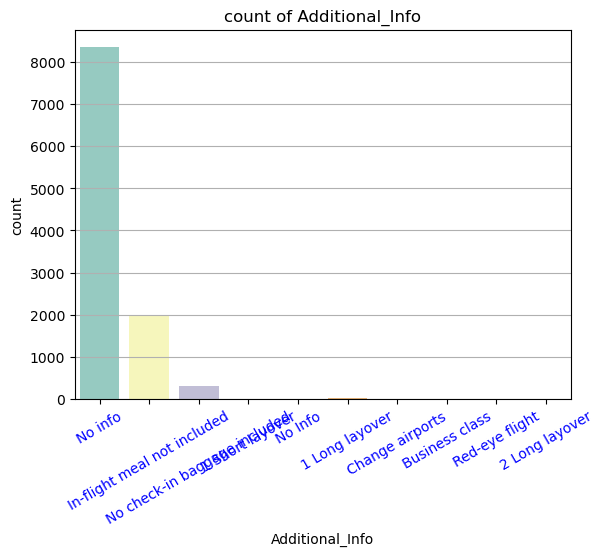

In [29]:
sns.set_palette("Set3")
for i in data_train_df.select_dtypes(include=["object"]).columns:
    sns.countplot(
        x=data_train_df[i])
    plt.grid(axis="y")
    plt.title(f"count of {i}")
    plt.xticks(rotation= 30, color= "blue")
    plt.show()

***UNIVERIATE ANALYSIS FOR CONTINUES VARIABLE***

<AxesSubplot:xlabel='Price', ylabel='Density'>

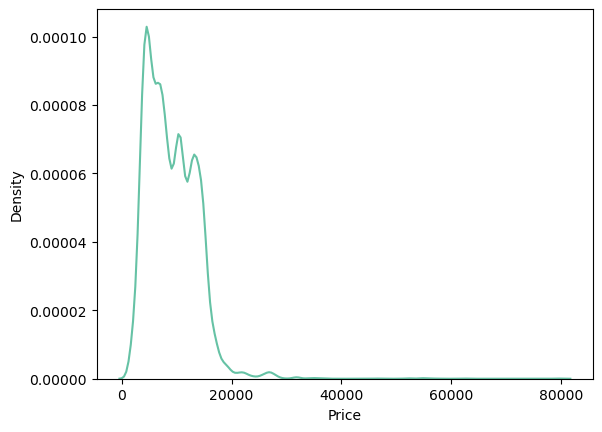

In [45]:
sns.kdeplot(data_train_df["Price"])

<AxesSubplot:>

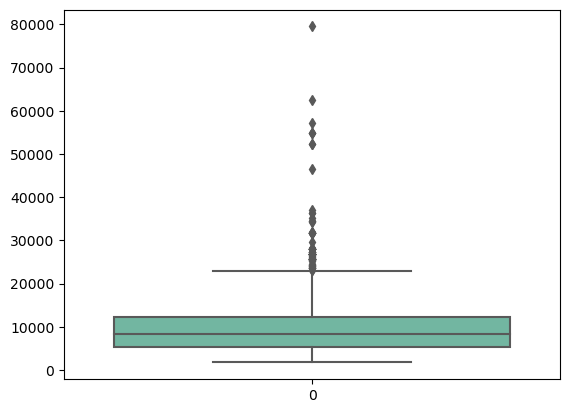

In [46]:
sns.boxplot(data= data_train_df["Price"])

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

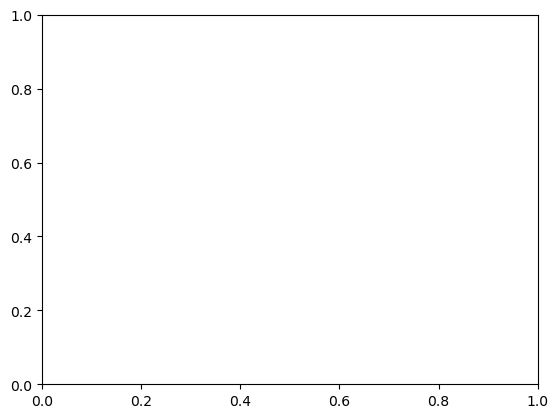

In [37]:
sns.kdeplot(data_train_df["Arrival_Time"])

In [38]:
sns.boxplot(data= data_train_df["Arrival_Time"])

ValueError: could not convert string to float: '01:10 22 Mar'

In [53]:
sns.boxplot(data= data_train_df["Duration"])

ValueError: could not convert string to float: '2h 50m'

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

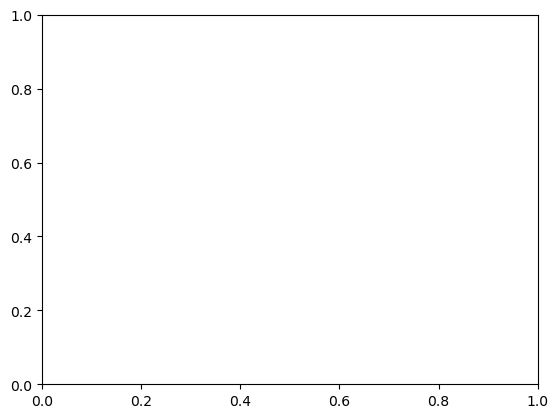

In [54]:
sns.kdeplot(data_train_df["Duration"])

***BIVARIATE ANALYSIS(CAT )***

In [58]:
def bivariate(col1, col2):
    bi=pd.crosstab(index = data_train_df[col1], 
        columns= data_train_df[col2],
        values= data_train_df[col2],
        aggfunc= "count")
    
    fig, ax= plt.subplots(figsize=(10,6) ) 
    bi.plot(kind= "bar", ax=ax)
    plt.grid(axis= "y")
    plt.xticks(color= "red", rotation= 30)
    plt.yticks(color= "red", rotation= 30)
    plt.title( f"{col1}  by {col2}" )

In [56]:
data_train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

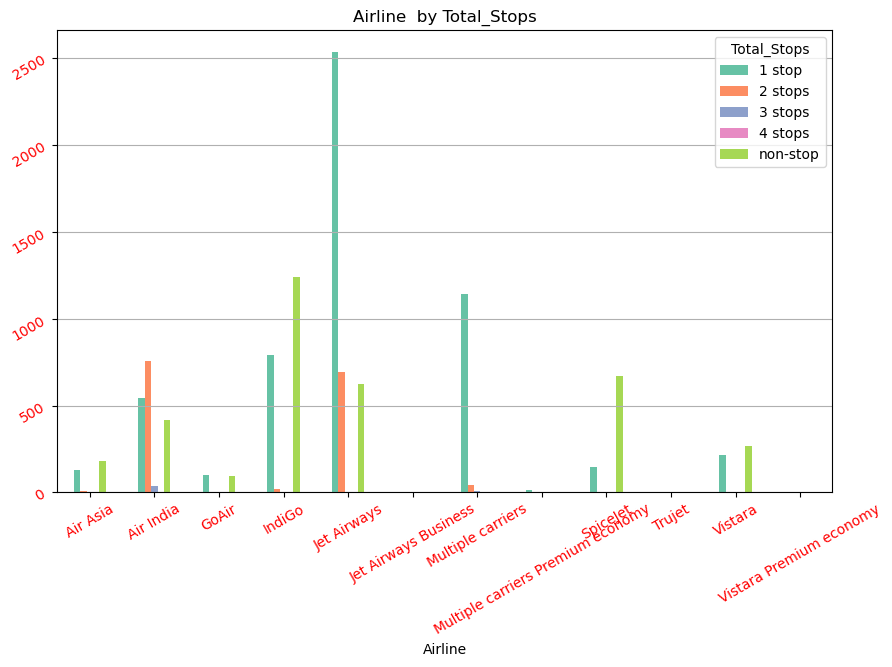

In [61]:
bivariate("Airline", "Total_Stops")

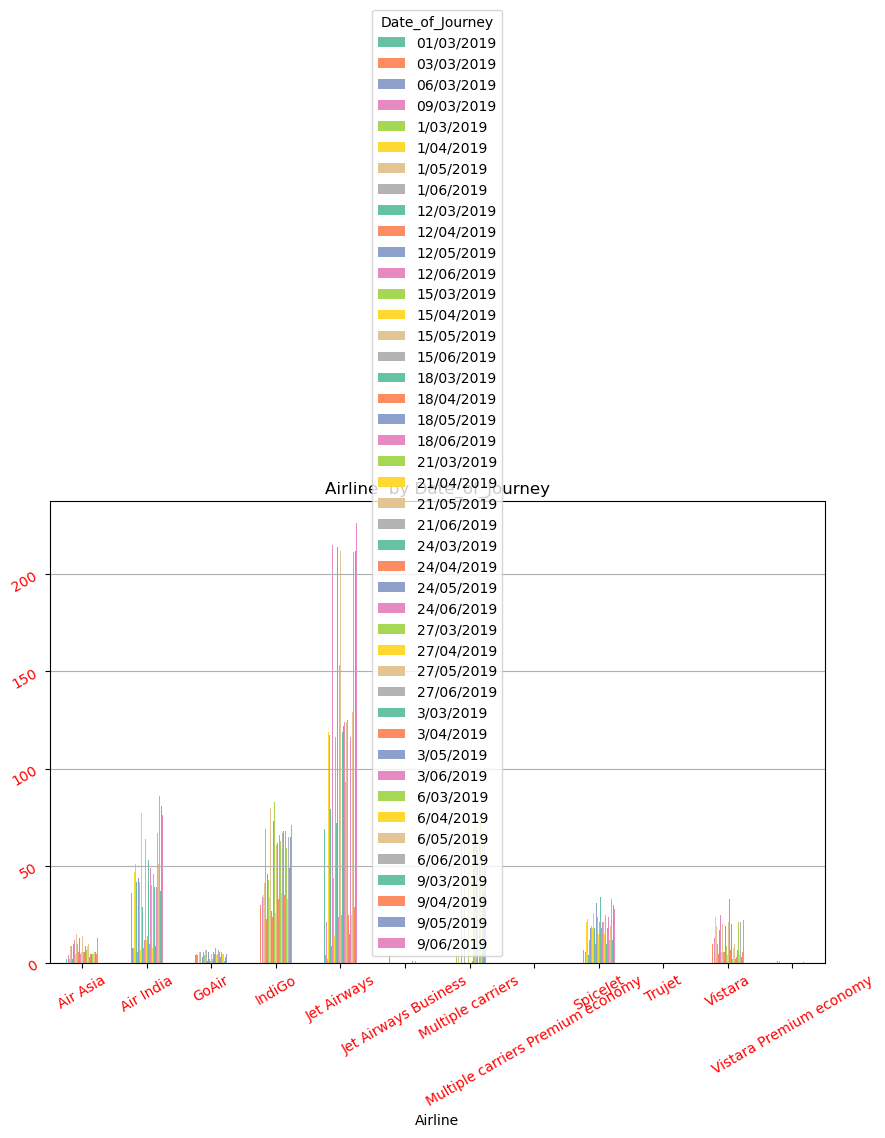

In [79]:
bivariate("Airline", "Date_of_Journey")

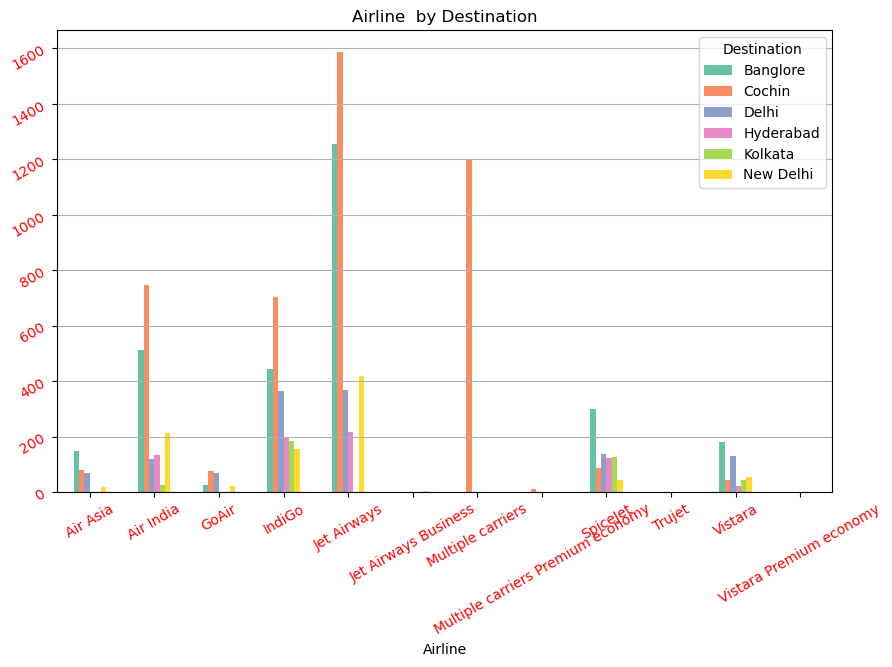

In [65]:
bivariate("Airline", "Destination")

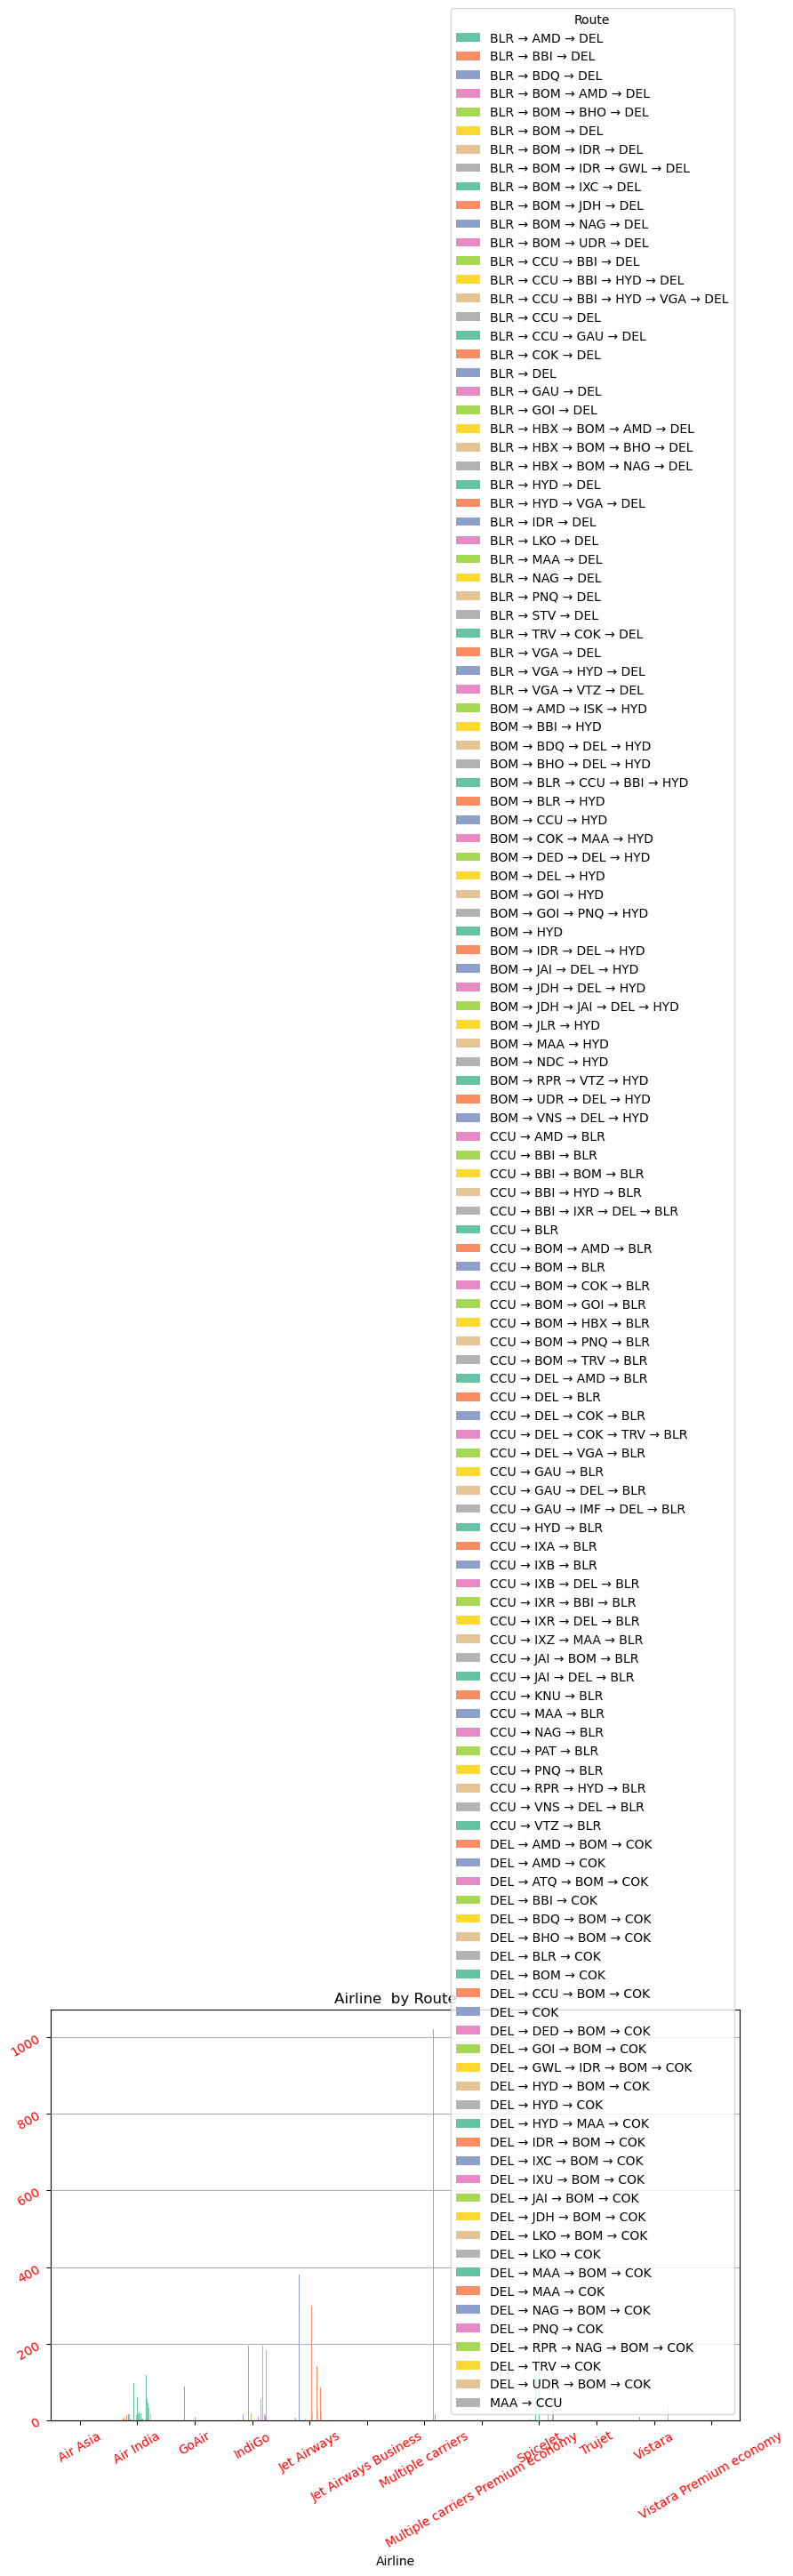

In [81]:
bivariate("Airline", "Route")

***BIVARIATE ANALYSIS(CAT VS NUM)***

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

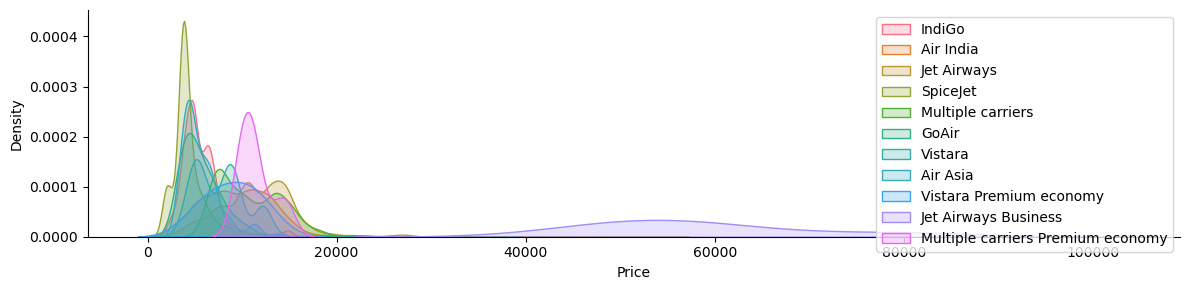

In [84]:
ola = sns. FacetGrid(data= data_train_df , hue= 'Airline' , aspect= 4) 
ola.map(sns.kdeplot, "Price", shade= True)
plt.legend()
plt.show

<AxesSubplot:xlabel='Airline', ylabel='Price'>

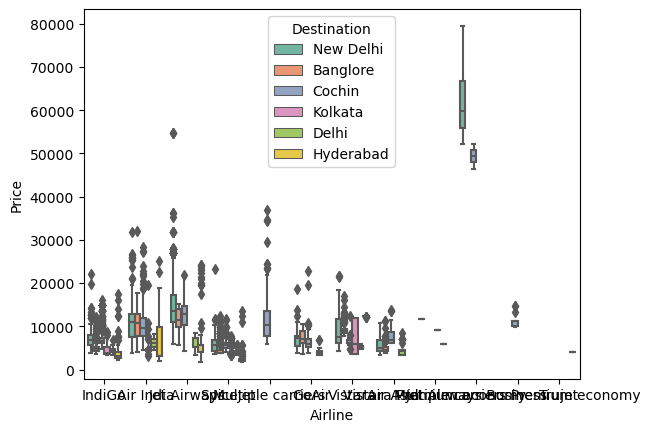

In [86]:
sns.boxplot(data= data_train_df, x="Airline", y="Price", hue="Destination" )

# Features Engineering 

***Step 1***

# Outlier treatment 

***Step 2***
# Variable transformation

***Step 1***
# Variable creation 